<a href="https://colab.research.google.com/github/kausnz/ml_zoomcamp_homework/blob/main/lessons/ml_zoomcamp_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
%autosave 5

Autosaving every 5 seconds


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 3.2 Data Preparation

In [63]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
    
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head().T

--2022-09-30 19:07:16--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv.1’

WA_Fn-UseC_-Telco-C 100%[===================>] 954.59K  --.-KB/s    in 0.05s   

2022-09-30 19:07:17 (19.1 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv.1’ saved [977501/977501]



,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [64]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.head().T    

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [65]:
df.totalcharges.head().T
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce")

df.totalcharges.isnull().sum()

df.totalcharges = df.totalcharges.fillna(0)


In [66]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## 3.3 Setting up the validation framework

In [67]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [68]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=-True)

y_full_train =  df_full_train.churn.values
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

In [69]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [70]:
# explore what the relative frequency of each value
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [71]:
df_full_train.churn.mean()  # this gives the churn rate
global_churn_rate = df_full_train.churn.mean().round(2)
global_churn_rate

0.27

In [72]:
df_full_train.dtypes

# The numerical variables are
# tenure
# monthlycharges
# totalcharges

# seniorcitizen is a actually a categorical variable, although its type is int64

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [73]:
df_full_train.columns.values

array(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'churn'], dtype=object)

In [74]:
# Now we want to identify the numerical and categorical variables

# a list of the numerical variables
numerical = ['tenure', 'monthlycharges', 'totalcharges']

# select the categorical variables - delete numerical, ids and chrun from the full list of columns
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod']

In [75]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance (part of EDA): Churn Rate and Risk Ratio

Identifying which features affect our target variable
* Churn rate
* Risk ratio
* Mutual information - later

In [76]:
# churn based on gender
df_full_train.gender.unique()
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_female, churn_male, global_churn_rate

(0.27682403433476394, 0.2632135306553911, 0.27)

In [77]:
# churn based on whether the customer lives with a partner
df_full_train.partner.unique()
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner, churn_no_partner, global_churn_rate

(0.20503330866025166, 0.3298090040927694, 0.27)

In [78]:
from IPython.display import display

for c in df_full_train[categorical].columns.values:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()
    
# If the risk is > 1, then that variable is important for our model as it has an influence on the global churn.

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


## 3.6 Feature importance (part of EDA): Mutual Information (for the categorical variables)

In [79]:
from sklearn.metrics import mutual_info_score

In [80]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [81]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [82]:
tlist = list()

for c in categorical:
    score = mutual_info_score(df_full_train.churn, df_full_train[c])
    tlist.append({'col' : c,  'score' : str(score)})
sorted(tlist, key = lambda d: d['score'], reverse=True)

[{'col': 'contract', 'score': '0.0983203874041556'},
 {'col': 'onlinesecurity', 'score': '0.06308524972985574'},
 {'col': 'techsupport', 'score': '0.06103245991777444'},
 {'col': 'internetservice', 'score': '0.055867945893496467'},
 {'col': 'onlinebackup', 'score': '0.0469234640537918'},
 {'col': 'deviceprotection', 'score': '0.04345286925268559'},
 {'col': 'paymentmethod', 'score': '0.043210027531582915'},
 {'col': 'streamingtv', 'score': '0.03185333110086085'},
 {'col': 'streamingmovies', 'score': '0.03158089669519908'},
 {'col': 'paperlessbilling', 'score': '0.01758882715925275'},
 {'col': 'dependents', 'score': '0.012345815445534689'},
 {'col': 'partner', 'score': '0.009967689095399745'},
 {'col': 'seniorcitizen', 'score': '0.009410216144208144'},
 {'col': 'multiplelines', 'score': '0.0008574478744731856'},
 {'col': 'phoneservice', 'score': '0.00022871269738296285'},
 {'col': 'gender', 'score': '0.0001174846211139946'}]

In [83]:
# A better way to create the above list + sort

def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature Importance (part of EDA): Correlation (for the numerical variables)

In [84]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [85]:
# churn rate when tenure is =< 2months
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [86]:
# churn rate when tenure is > 2 and  < 12 months
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [87]:
# churn rate when tenure is > 12months
df_full_train[df_full_train.tenure > 12].churn.mean()

# So as we can see the churn rate drops as the tenure increases

0.17634908339788277

## 3.8 One-Hot Encoding - for encoding categorical variables
Why we do this? Because ML models can only work with numerical values. Therefore categorical variables need to be represented in numbers. One-Hot encoding does exactly that.

In [88]:
from sklearn.feature_extraction import DictVectorizer

In [89]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [90]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts) # fit() makes the vectorizer 'understand' what's in the df so it can split the data accordingly when transform() is called.
# Note: you are passing a dict. Not a df.

DictVectorizer(sparse=False)

In [91]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [92]:
X_train = dv.transform(train_dicts)  # Note: you are passing a dict. Not a df.

In [93]:
# or you can do both fit and transform in one go
X_train = dv.fit_transform(train_dicts)  # Note: you are passing a dict. Not a df.

In [94]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# What you are getting from the transform() is the feature data set X that can be passed into the logistic regression model as input. Any variables that hot-one encoding applies will have 
# theor data encoded.

## 3.9 Logistic Regression

In [95]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-5, 5,100)
z

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [96]:
sigmoid(z)

array([0.00669285, 0.00739896, 0.00817894, 0.00904041, 0.00999169,
       0.01104196, 0.01220126, 0.01348063, 0.01489212, 0.01644893,
       0.01816549, 0.02005754, 0.0221422 , 0.02443814, 0.02696557,
       0.02974643, 0.03280439, 0.036165  , 0.0398557 , 0.04390588,
       0.04834692, 0.05321217, 0.0585369 , 0.06435824, 0.07071501,
       0.07764755, 0.0851974 , 0.093407  , 0.1023192 , 0.11197671,
       0.12242144, 0.13369374, 0.14583148, 0.1588691 , 0.17283646,
       0.18775769, 0.20364993, 0.22052213, 0.23837374, 0.25719365,
       0.2769591 , 0.29763488, 0.31917283, 0.34151151, 0.36457644,
       0.38828059, 0.41252537, 0.43720205, 0.46219351, 0.48737642,
       0.51262358, 0.53780649, 0.56279795, 0.58747463, 0.61171941,
       0.63542356, 0.65848849, 0.68082717, 0.70236512, 0.7230409 ,
       0.74280635, 0.76162626, 0.77947787, 0.79635007, 0.81224231,
       0.82716354, 0.8411309 , 0.85416852, 0.86630626, 0.87757856,
       0.88802329, 0.8976808 , 0.906593  , 0.9148026 , 0.92235

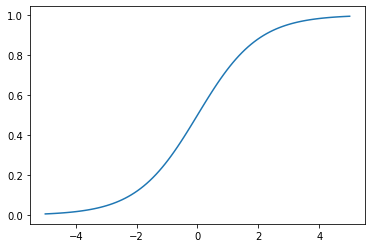

In [97]:
plt.plot(z, sigmoid(z))

## 3.10 Training logistic regression with Scikit-Learn

In [98]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train) # training the model


LogisticRegression()

In [99]:
model.coef_   # these are the featrue weights calculated from the above training using fit()

array([[ 4.74743023e-01, -1.74873745e-01, -4.07548836e-01,
        -2.96861375e-02, -7.79934210e-02,  6.26832745e-02,
        -8.89706905e-02, -8.13921425e-02, -3.43106902e-02,
        -7.33688684e-02, -3.35215337e-01,  3.16506469e-01,
        -8.89706905e-02,  3.67442683e-03, -2.58137926e-01,
         1.41442641e-01,  9.01572599e-03,  6.25305156e-02,
        -8.89706905e-02, -8.12393836e-02,  2.65587549e-01,
        -8.89706905e-02, -2.84296417e-01, -2.31204390e-01,
         1.23524832e-01, -1.66024035e-01,  5.83444760e-02,
        -8.70096012e-02, -3.20577106e-02,  7.04847252e-02,
        -5.90969719e-02,  1.41442641e-01, -2.49122200e-01,
         2.15476485e-01, -1.20367919e-01, -8.89706905e-02,
         1.01659051e-01, -7.08963146e-02, -8.89706905e-02,
         5.21874466e-02,  2.13380904e-01, -8.89706905e-02,
        -2.32089772e-01, -7.04109209e-02,  3.82433716e-04]])

In [100]:
model.intercept_ # this is the bias term from training

array([-0.10903461])

In [101]:
# predict() returns the y target predictions. But these are 'Hard predictions'. That means sklearn have decided 0's and 1's based on an internal probability threashold.
# We need to make that decision outselves, so we will NOT be using these predictions.

model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [102]:
# predict_proba() gives the underlying proberbility for 1-P(1) and P(1). These are known as 'soft predictions'.
model.predict_proba(X_train)

# P(1) is probability of churning
# 1-P(1) is probability of NOT churning. This can also be considered as P(0).

# Our forcus in on P(1)

#  1-P(1)     P(1)

array([[0.90451531, 0.09548469],
       [0.32067017, 0.67932983],
       [0.36632206, 0.63367794],
       ...,
       [0.46838428, 0.53161572],
       [0.95746004, 0.04253996],
       [0.30127008, 0.69872992]])

In [103]:
# just extract P(1) values
y_train_pred = model.predict_proba(X_train)[:, 1]
y_train_pred

array([0.09548469, 0.67932983, 0.63367794, ..., 0.53161572, 0.04253996,
       0.69872992])

In [104]:
# Like we used RMSE to measure the accuracy of the linear regression models, for Logistic Regression models we do the following.

# Calculte the accuracy based on the train data frame

y_train_churn_decision = y_train_pred >= 0.5
(y_train == y_train_churn_decision).mean()

0.805207100591716

In [105]:
# Calculte the accuracy based on the validation dataframe
y_val_pred = model.predict_proba(X_val)[:, 1]
y_val_pred
y_val_churn_decision = y_val_pred >= 0.5
(y_val == y_val_churn_decision).mean()

0.8034066713981547

## 3.11 Model Interpretation

Here we try to understand what the above coefficients really mean by training a smaller model with fewer features.

In [106]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [107]:
# Combile feature names with their corresponding coefficients
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [108]:
# it's difficult to understand the model with such a large set of features. Therefore let's just focus on three features.
small = ['contract', 'tenure', 'monthlycharges']

In [109]:
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [110]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [111]:
# so no we know how it looks for 10 observations. Apply it for all the obs in both df_train and df_valid.

dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [112]:
list(dv_small.get_feature_names_out())

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [113]:
X_train_small = dv_small.transform(dicts_train_small)
X_val_small = dv_small.transform(dicts_val_small)

In [114]:
# Now apply the X data sets on the logistic regression model

model_small = LogisticRegression()
model_small.fit(X_train_small, y_train) #<----- training the model

LogisticRegression()

In [115]:
# looking at the bais term
w0 = model_small.intercept_

In [116]:
# looking at the coefficients (feature weights)
model_small.coef_

array([[ 0.97004492, -0.0251365 , -0.94872201,  0.02748236, -0.03618424]])

In [117]:
w = model_small.coef_[0]

# display along with the corresponding features
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

## 3.12 Using the Model

In [118]:
# We train the model with the full train data set

dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(dicts_full_train)
model = LogisticRegression()
model.fit(X_full_train, y_full_train) #<--- training the model with the full train data set


LogisticRegression()

In [119]:
# We have trained the model with the full_train dataset

# Now calculate the predictions for the test dataset using the above 'trained' model

dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test) # no need to fit here as we did a fit above. Can fit here if you like but won't make a difference.
y_pred = model.predict_proba(X_test)[:,1]
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

0.815471965933286

In [120]:
# Let's apply this model to a single customer

customer = dicts_test[10] # 11th customer in the list
X_customer = dv.transform(customer)
model.predict_proba(X_customer)[:,1] # 0.4056811, so according to the prediction this customer us not going to churn

array([0.4056811])